#       Quantium Virtual Internship - Retail Strategy and Analytics - Task 1





In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import xlrd
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!export PATH=/Library/TeX/texbin:$PATH

'export' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
#Reading the dataset
path = '/content/drive/My Drive/QVI_transaction_data.xlsx'
data = pd.read_excel(path)
data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


## Exploratory data analysis
The first step in any analysis is to first understand the data. Let's take a look
at each of the datasets provided.

In [3]:
#Information/Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We can see that the date column is in an integer format. Let's change this to a
date format.

In [4]:
#Converting date from excel integer date to datetime format
def convert_date(date):

  python_date = datetime(*xlrd.xldate_as_tuple(date, 0))
  python_date = python_date.date()
  return python_date
data.DATE = data.DATE.apply(convert_date)
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


We should check that we are looking at the right products by examining PROD_NAME.

In [6]:
#Looking at the different products
data.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

As we are only interested in words that will tell us if the product is chips or
not, let's remove all words with digits and special characters such as '&' from our
set of product words


In [7]:
#Removing special characters like &,/ from the PROD_NAME feature
data.PROD_NAME = data.PROD_NAME.map(lambda x: x.replace('&', ''))
data.PROD_NAME = data.PROD_NAME.map(lambda x: x.replace('/', ''))
data.head(10)
data1 = data.copy()

Looks like we are definitely looking at potato chips.
There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.



In [8]:
#Function to remove salsa products as we are interested in chips only
def remove_salsa(x):
  indexes = []
  cnt = 0
  for i in range(x.shape[0]):
    if 'salsa' in x[i].lower():
      indexes.append(i)
      
      cnt = cnt + 1
      
  return indexes

In [9]:
salsa_index = remove_salsa(data1.PROD_NAME)
data1.loc[salsa_index, 'SALSA'] = 'YES'
data1.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SALSA
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NaN
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,NaN
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,NaN
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,NaN
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,NaN
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,YES
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar 330g,1,5.7,NaN
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,NaN
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,NaN
9,2018-08-18,7,7150,6900,52,Grain Waves Sour CreamChives 210G,2,7.2,NaN


In [10]:
data1.loc[data1.SALSA.isnull(), 'SALSA'] = 'NO'

In [11]:
data1.head(15)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SALSA
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NO
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,NO
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,NO
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,NO
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,NO
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,YES
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar 330g,1,5.7,NO
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,NO
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,NO
9,2018-08-18,7,7150,6900,52,Grain Waves Sour CreamChives 210G,2,7.2,NO


Next, we can use `describe()` to check summary statistics such as mean, min and max
values for each feature to see if there are any obvious outliers in the data and if
there are any nulls in any of the columns (`NA's : number of nulls` will appear in
the output if there are any nulls).

In [12]:
data1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


There are no nulls in the columns but product quantity appears to have an outlier
which we should investigate further. Let's investigate further the case where 200
packets of chips are bought in one transaction.


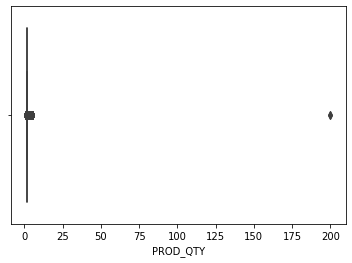

In [13]:
#Using a boxplot to visualise outliers in PROD_QTY feature
sns.boxplot( x = data1['PROD_QTY'])


Over to you! Use a filter to examine the transactions in question.


In [14]:
#Inspecting the outlier
data1[data1.TOT_SALES > 175]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SALSA
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,NO
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,NO


There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer. 
Let's see if the customer has had other transactions


In [15]:
data1[data1.LYLTY_CARD_NBR == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SALSA
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,NO
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,NO


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.


In [16]:
#Removing the outlier
data1.drop([69762, 69763], inplace = True)

 Now, let's look at the number of transaction lines over time to see
if there are any obvious data issues such as missing data.


In [17]:
data1 = data1.sort_values(by = 'DATE')
data1.DATE.value_counts().sort_index()

2018-07-01    724
2018-07-02    711
2018-07-03    722
2018-07-04    714
2018-07-05    712
             ... 
2019-06-26    723
2019-06-27    709
2019-06-28    730
2019-06-29    745
2019-06-30    744
Name: DATE, Length: 364, dtype: int64

There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

 Over to you - create a column of dates that includes every day from 1 Jul 2018 to
30 Jun 2019, and join it onto the data to fill in the missing day.


In [18]:
#Creating a date sequence from 2018/07/01 to 2019/06/30 (365 days)
date1 = '2018/07/01'
datelist = pd.date_range(date1, periods=365).date


In [20]:
#Finding the missing date
for i in datelist:
  if i not in data1.DATE.unique():
    print('Missing date is: ', i)

Missing date is:  2018-12-25


Thus, we can see that the missing date is 2018-12-25 i.e christmas, the day on which all shops are closed. Hence the total sales made on this day is 0 

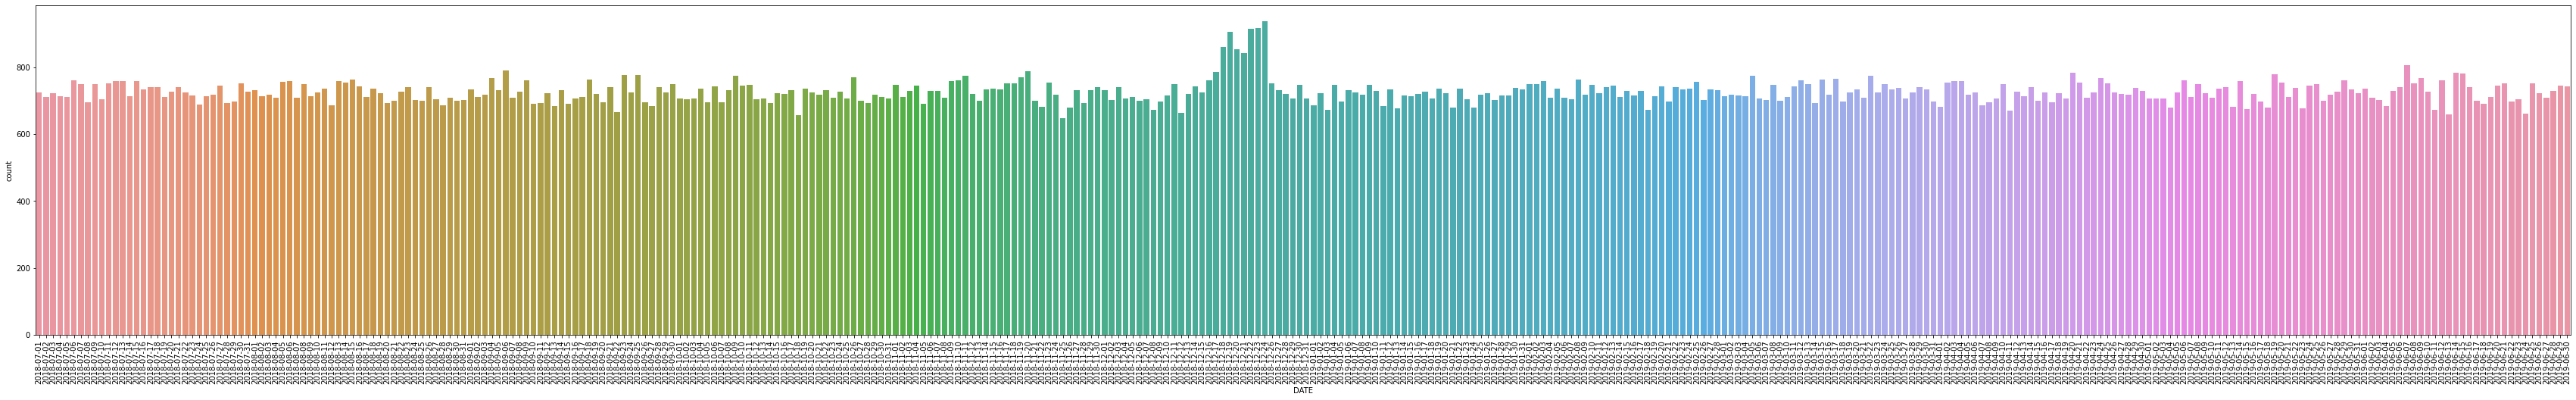

In [24]:
plt.figure(figsize = (60, 8))
plt.xticks(rotation = 90)
sns.countplot(data1.DATE)

We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.


Now that we are satisfied that the data no longer has outliers, we can move on to
creating other features such as brand of chips or pack size from PROD_NAME. We will
start with pack size.

We can work this out by taking the digits that are in PROD_NAME


In [28]:
#Creating a new pack size feature
pattern = '(\d+(g|G))'
data1['PACK_SIZE'] = data1.PROD_NAME.str.extract(pat = pattern)


In [29]:
data1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SALSA,PACK_SIZE
205333,2018-07-01,24,24109,20881,54,CCs Original 175g,2,4.2,NO,175g
202059,2018-07-01,236,236023,238660,100,Smiths Crinkle Cut Chips ChsOnion170g,2,5.8,NO,170g
102495,2018-07-01,45,45100,40977,47,Doritos Corn Chips Original 170g,2,8.8,NO,170g
217968,2018-07-01,21,21284,17968,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,YES,300g
149892,2018-07-01,262,262188,262373,114,Kettle Sensations Siracha Lime 150g,2,9.2,NO,150g


In [30]:
data1['PACK_SIZE'] = data['PACK_SIZE'].map(lambda x: x.lower())

In [31]:
data1.shape

(264834, 10)

Let's check if the pack sizes look sensible


In [41]:
data1.PACK_SIZE.max()

'90g'

 Let's plot a histogram of PACK_SIZE since we know that it is a categorical
variable and not a continuous variable even though it is numeric.

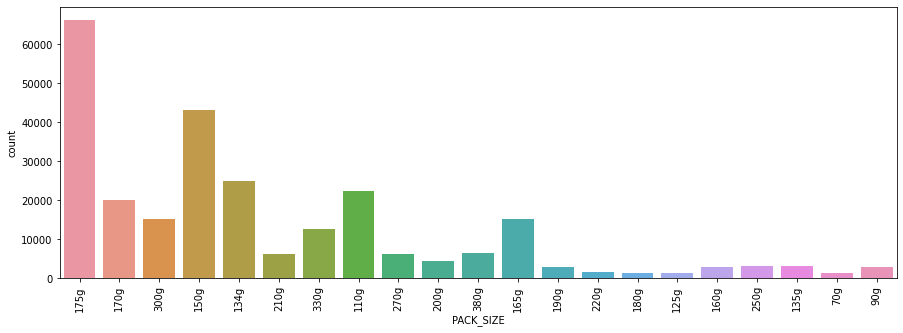

In [38]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
sns.countplot(data1.PACK_SIZE,  orient = 'h')

The largest size is 380g and the smallest size is 70g - seems sensible!


In [ ]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
sns.countplot(data3.PROD_NAME,  orient = 'h')

Now to create brands, we can use the first word in PROD_NAME to work out the brand
name...

Over to you! Create a column which contains the brand of the product, by
extracting it from the product name.

In [42]:
data1['BRAND_NAME'] = data1.PROD_NAME.map(lambda x: x.split()[0])
data1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SALSA,PACK_SIZE,BRAND_NAME
205333,2018-07-01,24,24109,20881,54,CCs Original 175g,2,4.2,NO,175g,CCs
202059,2018-07-01,236,236023,238660,100,Smiths Crinkle Cut Chips ChsOnion170g,2,5.8,NO,170g,Smiths
102495,2018-07-01,45,45100,40977,47,Doritos Corn Chips Original 170g,2,8.8,NO,170g,Doritos
217968,2018-07-01,21,21284,17968,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,YES,300g,Old
149892,2018-07-01,262,262188,262373,114,Kettle Sensations Siracha Lime 150g,2,9.2,NO,150g,Kettle


In [43]:
data1.BRAND_NAME.unique()

array(['CCs', 'Smiths', 'Doritos', 'Old', 'Kettle', 'Pringles', 'RRD',
       'Grain', 'Infuzions', 'Twisties', 'Thins', 'Red', 'WW', 'NCC',
       'Woolworths', 'Cheezels', 'Tyrrells', 'Cheetos', 'Cobs', 'Burger',
       'Tostitos', 'Smith', 'GrnWves', 'Dorito', 'Natural', 'Infzns',
       'French', 'Sunbites', 'Snbts'], dtype=object)

Some of the brand names look like they are of the same brands - such as RED and
RRD, which are both Red Rock Deli chips. Let's combine these together.

In [50]:
data1.loc[data1.BRAND_NAME == 'Dorito', 'BRAND_NAME'] = 'Doritos'
data1.loc[data1.BRAND_NAME == 'RRD', 'BRAND_NAME'] = 'Red'
data1.loc[data1.BRAND_NAME == 'Snbts', 'BRAND_NAME'] = 'Sunbites'

data1.BRAND_NAME.unique()

array(['CCs', 'Smiths', 'Doritos', 'Old', 'Kettle', 'Pringles', 'Red',
       'Grain', 'Infuzions', 'Twisties', 'Thins', 'WW', 'NCC',
       'Woolworths', 'Cheezels', 'Tyrrells', 'Cheetos', 'Cobs', 'Burger',
       'Tostitos', 'Smith', 'GrnWves', 'Natural', 'Infzns', 'French',
       'Sunbites'], dtype=object)

In [51]:
data1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
SALSA             0
PACK_SIZE         0
BRAND_NAME        0
dtype: int64

# Examining customer data


Now that we are happy with the transaction dataset, let's have a look at the
customer dataset.

In [52]:
customer_path = '/content/drive/My Drive/QVI_purchase_behaviour.csv'
customer_data = pd.read_csv(customer_path)
customer_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [53]:
customer_data.shape

(72637, 3)

In [54]:
customer_data[customer_data.LYLTY_CARD_NBR == 226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
59694,226000,OLDER FAMILIES,Premium


In [55]:
customer_data.LYLTY_CARD_NBR.nunique()

72637

In [56]:
data1.LYLTY_CARD_NBR.nunique()

72636

In [57]:
customer_data = customer_data[~(customer_data.LYLTY_CARD_NBR == 226000)]

In [58]:
customer_data.LYLTY_CARD_NBR.nunique()

72636

As the number of rows in `transactionData` is the same as that of `customerData`, we can be
sure that no duplicates were created.So we can merge these two data frames

In [60]:
merged_data = pd.merge(left = customer_data, right = data1, on = 'LYLTY_CARD_NBR' )

Let's also check if some customers were not matched on by checking for nulls.

In [61]:
merged_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
SALSA               0
PACK_SIZE           0
BRAND_NAME          0
dtype: int64

Great, there are no nulls! So all our customers in the transaction data has been
accounted for in the customer dataset.


In [62]:
merged_data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000


In [ ]:
#merged_data.to_csv(r'/content/drive/My Drive/QVI-Data.csv')

#DATA ANALYSIS

Now, sice we are done with cleaning the dataset, let's start the data analysis

In [64]:
qvi_data = pd.read_csv('/content/drive/My Drive/QVI-Data.csv')
qvi_data.head()

,Unnamed: 0,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SALSA,PACK_SIZE,BRAND_NAME
0,0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NO,175g,Natural
1,1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli ChiknGarlic Aioli 150g,1,2.7,NO,150g,Red
2,2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour CreamChives 210G,1,3.6,NO,210g,Grain
3,3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,NO,175g,Natural
4,4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,NO,160g,WW


In [65]:
qvi_data.shape

(264834, 14)

Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and
plotting the split by these segments to describe which customer segment contribute
most to chip sales.


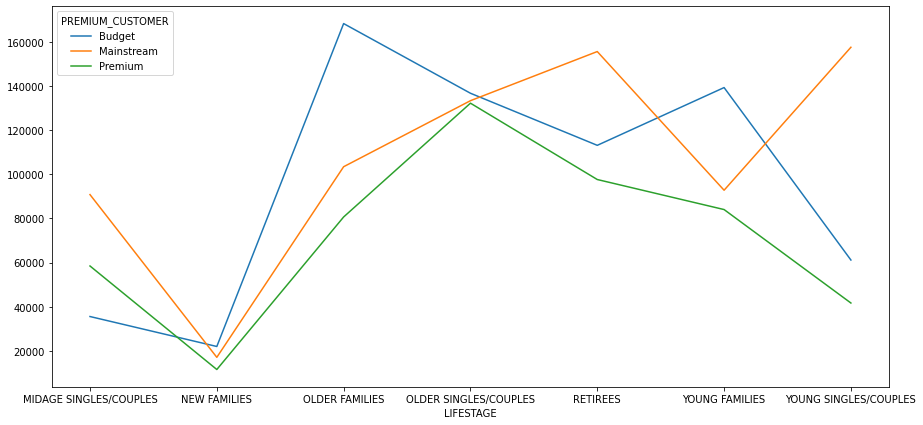

In [66]:
fig, ax = plt.subplots(figsize=(15,7))
qvi_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum().unstack().plot(ax = ax)

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees

Let's see if the higher sales are due to there being more customers who buy chips.


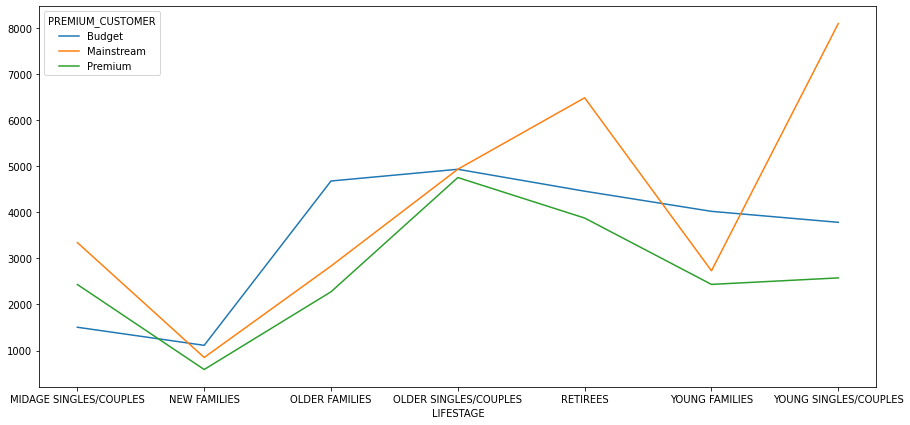

In [67]:
fig, ax = plt.subplots(figsize=(15,7))
qvi_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique().unstack().plot(ax = ax)


There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer.
Let's have a look at this next.

 Over to you! Calculate and plot the average number of units per customer by those
two dimensions.


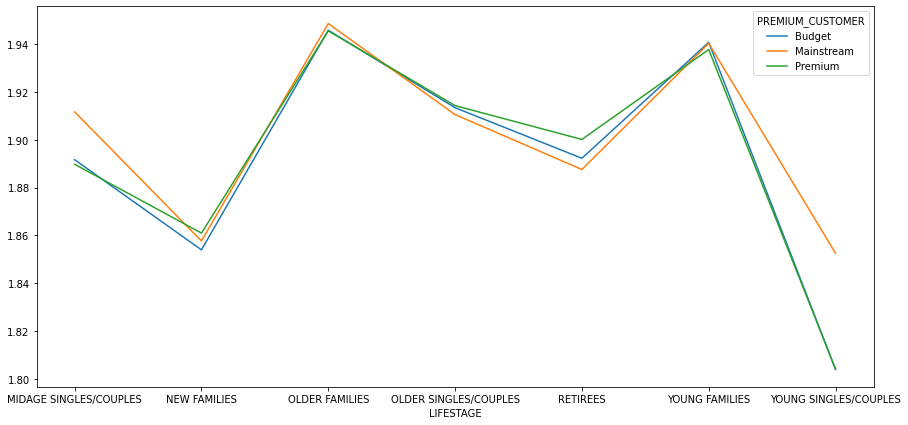

In [69]:
def calculate_avg_chips(x):
  avg_chip = x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].count()
  return avg_chip

fig, ax = plt.subplots(figsize=(15,7))
qvi_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(calculate_avg_chips).unstack().plot(ax = ax)

Older families and young families in general buy more chips per customer


Let's also investigate the average price per unit chips bought for each customer
segment as this is also a driver of total sales.


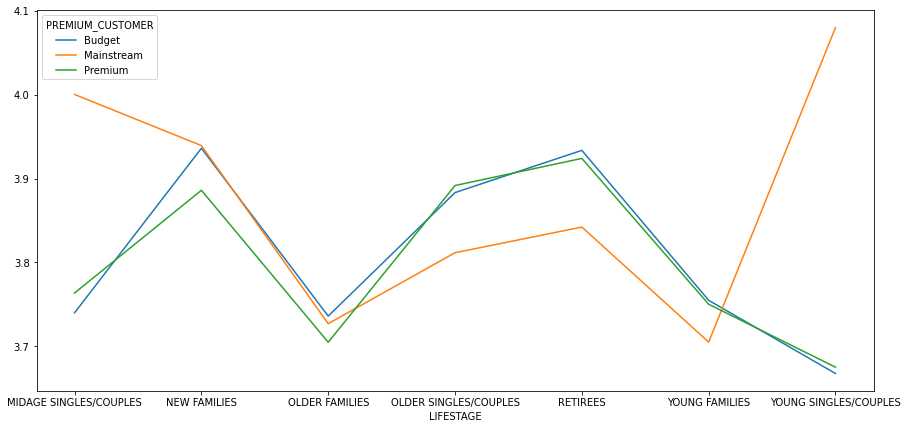

In [68]:
def calculate_avg(x):
  avg = x['TOT_SALES'].sum() / x['PROD_QTY'].sum()
  return avg
fig, ax = plt.subplots(figsize=(15,7))
qvi_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(calculate_avg).unstack().plot(ax = ax)

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

Perform an independent t-test between mainstream vs premium and budget midage young singles and couples


In [74]:
def ttest_avg(x):
  ttest_avg = x['TOT_SALES'] / x['PROD_QTY']
  return ttest_avg
mainstream_young_singles = qvi_data.loc[(qvi_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (qvi_data.PREMIUM_CUSTOMER == 'Mainstream')]

In [76]:
mainstream_young_singles_avgs = ttest_avg(mainstream_young_singles)

In [78]:
mainstream_midage_singles_couples = qvi_data.loc[(qvi_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES') & (qvi_data.PREMIUM_CUSTOMER == 'Mainstream')]

In [79]:
mainstream_midage_singles_couples_avgs = ttest_avg(mainstream_midage_singles_couples)

In [77]:
qvi_data.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [80]:
from scipy.stats import ttest_ind
ttest_ind(mainstream_young_singles_avgs, mainstream_midage_singles_couples_avgs)

Ttest_indResult(statistic=5.981554665641845, pvalue=2.2330882741711804e-09)

The t-test results in a p-value of 2.23e-9, i.e. the unit price for mainstream,
young and mid-age singles and couples [ARE NOT] significantly higher than
that of budget or premium, young and midage singles and couples.

We can verify the same using the kde plot of unit values for the two groups

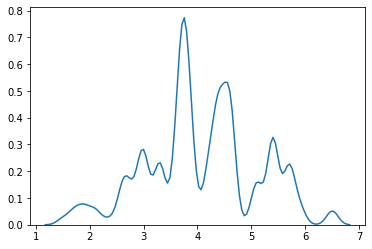

In [81]:
sns.kdeplot(mainstream_young_singles_avgs)

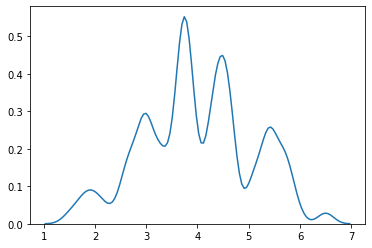

In [82]:
sns.kdeplot(mainstream_midage_singles_couples_avgs)

Deep dive into specific customer segments for insights
We have found quite a few interesting insights that we can dive deeper into. 

We might want to target customer segments that contribute the most to sales to
retain them or further increase sales. Let's look at Mainstream - young
singles/couples. For instance, let's find out if they tend to buy a particular
brand of chips.


Over to you! Work out of there are brands that these two customer segments prefer
more than others. You could use a technique called affinity analysis or a-priori
analysis (or any other method if you prefer)


In [83]:
brands_data1 = qvi_data.loc[(qvi_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (qvi_data.PREMIUM_CUSTOMER == 'Mainstream'), 'BRAND_NAME' ]


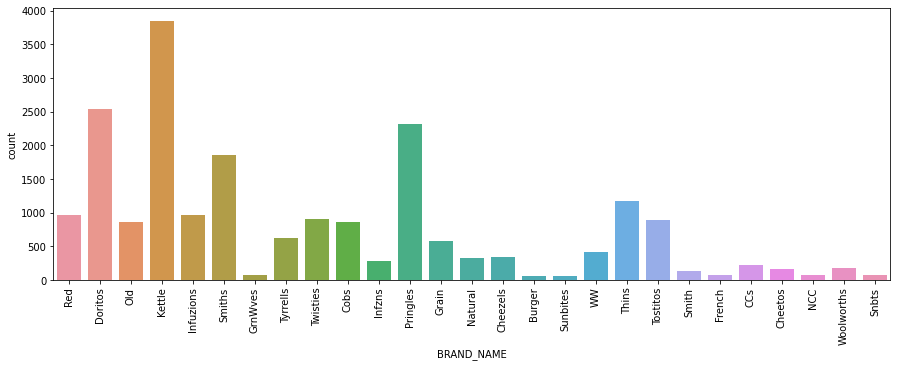

In [84]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
sns.countplot(brands_data)

We can see that :
Mainstream young singles/couples prefer buying chips from brands Kettle, Pringles and Smiths

Let's also find out if our target segment tends to buy larger packs of chips.


In [87]:
packs_data1 = qvi_data.loc[(qvi_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (qvi_data.PREMIUM_CUSTOMER == 'Mainstream'), 'PACK_SIZE' ]


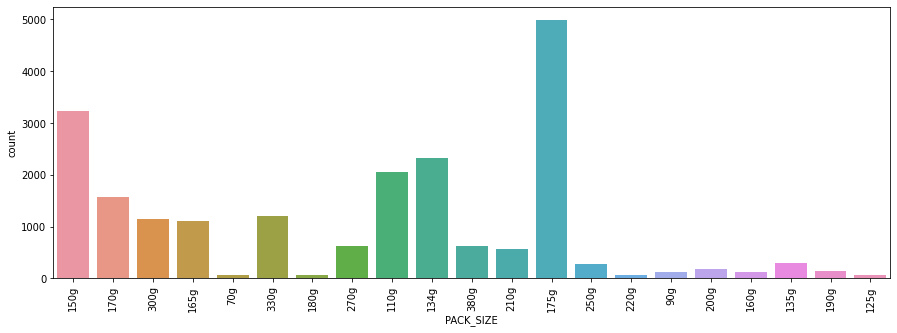

In [88]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
sns.countplot(packs_data1)

We can see that mainstream young singles/couples like to buy packs with size of 150g - 175g i.e medium size packs